In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
df = data.copy()

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [5]:
df.shape

(962, 2)

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

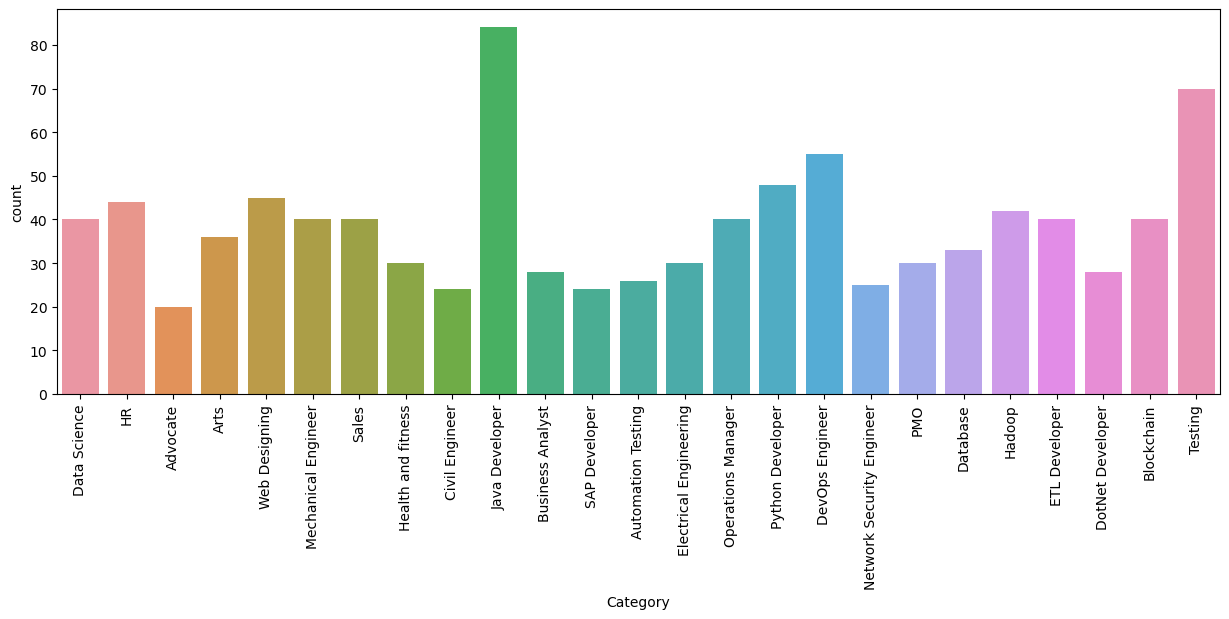

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x= df['Category'])
plt.xticks(rotation=90)
plt.show()


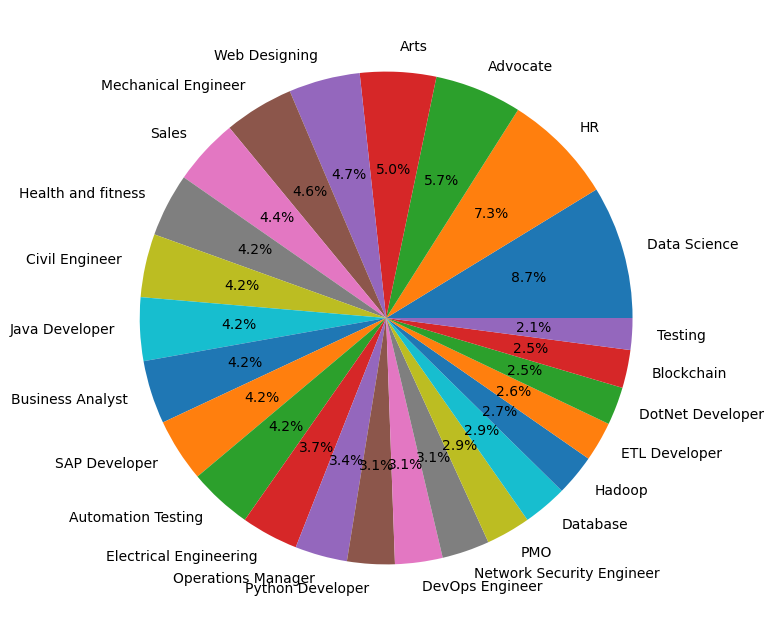

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(10,8))
plt.pie(counts,labels=labels,autopct='%1.1f%%');

In [9]:
import re
import string
def clean_resume(text):
    #clean_text = text.lower()
    clean_text = re.sub('http\S+\s',' ', text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('[%s]' % re.escape(string.punctuation), '', clean_text)
    clean_text = re.sub('#\S+\S', ' ', clean_text)
    clean_text = re.sub("@\S+"," ",clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text)
    clean_text = re.sub('\s+', ' ' , clean_text)
    return clean_text
    
#clean = lambda x: clean_text()

In [10]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [11]:
#df.Resume[0]

### word into categorical values

In [12]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy()

In [14]:
df1['Category'] = le.fit_transform(df1['Category'])

In [15]:
df1.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [16]:
df1.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### VECTORIZATION

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
tfidf = TfidfVectorizer(stop_words='english')

df2 = tfidf.fit_transform(df1['Resume'])

In [20]:
df2

<962x7892 sparse matrix of type '<class 'numpy.float64'>'
	with 164506 stored elements in Compressed Sparse Row format>

# spliting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df2,df1['Category'], test_size=0.3, random_state=100)

In [23]:
x_train.shape

(673, 7892)

In [24]:
x_test.shape

(289, 7892)

# MODEL fitting

## KNN classifier

In [25]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
knn_pred = knn.predict(x_test)
knn_pred

array([19,  2, 16,  3, 20, 24,  8, 24, 12,  3,  1, 17, 23, 21,  2, 16, 20,
        1, 21, 19, 15, 23, 18, 24, 23, 14, 20,  0, 17, 10, 11,  1, 10,  6,
       21, 12, 15, 16,  4,  9, 14,  4, 24, 15, 18, 12, 16,  2,  8, 21, 22,
       13,  3, 24,  4,  8, 23,  4,  5, 12, 15,  3, 16, 19, 19,  6,  8, 18,
       10,  8, 12,  2,  1,  1, 16, 22, 13,  1, 24, 10, 15,  7, 20, 24, 14,
       17, 17, 24, 12,  5, 20, 10, 15,  9,  2, 23,  1, 14, 10, 14, 18, 20,
       16, 20, 24, 23, 15, 22, 23, 10, 21, 23, 14,  8, 15, 18, 12, 16,  9,
       22, 10, 12,  8,  1, 20, 19,  3,  9, 10, 24,  1,  6,  5,  9,  2,  8,
        4, 21, 18, 15, 20,  1,  2, 17, 15,  3, 13, 15,  8, 15,  2, 16,  2,
        0,  9, 12, 24, 15, 15,  8, 13, 13, 23,  0, 13, 12, 15, 24, 22,  3,
       16, 19, 22, 23,  6, 13,  8, 18, 24, 19, 15,  8,  6,  2, 19, 11, 24,
        4,  0, 11, 16,  3,  6, 23,  9, 15, 16, 10,  5, 24,  3,  8, 24,  4,
        9, 10,  2, 12, 11, 16, 20,  4, 16, 23, 15,  8, 22, 17, 18, 14,  9,
        9, 13, 24, 18, 15

In [29]:
knn_accuracy = accuracy_score(y_test,knn_pred)

In [30]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00        15
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        11
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         3
           8       1.00      0.94      0.97        17
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        20
          17       1.00    

### OneVsRestClassifier

In [31]:
from sklearn.multiclass import OneVsRestClassifier
one = OneVsRestClassifier(KNeighborsClassifier())

In [32]:
one.fit(x_train,y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

In [33]:
one_pred = one.predict(x_test)

In [34]:
one_accuracy = accuracy_score(y_test,one_pred)

## SVM MODEL

In [35]:
from sklearn.svm import SVC

In [36]:
svm =SVC()

In [37]:
svm.fit(x_train,y_train)

SVC()

In [38]:
svm_pred= svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_pred)

### Random Forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rdm_frst = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=2,max_features='sqrt',max_depth=8)

In [41]:
rdm_frst.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [42]:
rdm_pred = rdm_frst.predict(x_test)
rdm_accuracy=accuracy_score(y_test,rdm_pred)

In [43]:
mdl = { 'Model' : ['KNN Classifier',' OneVsRestClassifier','SVM', 'Random Forest'],
       'Accuracy_score' : [knn_accuracy,one_accuracy,svm_accuracy,rdm_accuracy]
      }
model = pd.DataFrame(mdl)
model

,Model,Accuracy_score
0,KNN Classifier,0.993080
1,OneVsRestClassifier,0.993080
2,SVM,0.989619
3,Random Forest,0.934256
